In [1]:
import wandb
import sys
import matplotlib.pyplot as plt
import scprep
import pandas as pd
sys.path.append('../src/')
from evaluate import get_results
from omegaconf import OmegaConf
from main import load_data
from model import AEDist
import numpy as np
import os
import glob
import torch

In [2]:
# Initialize wandb (replace 'your_entity' and 'your_project' with your specific details)
wandb.login()
api = wandb.Api()

# Specify your entity, project, and sweep ID
entity = "xingzhis"
project = "dmae"
sweep_id = 't2nhfazc'

# Fetch the sweep
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")

run_ids = [run.id for run in sweep.runs]

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: xingzhis. Use `wandb login --relogin` to force relogin


In [3]:
run_id = 'wxszchk5'

In [4]:
run = [run for run in sweep.runs if run.id == run_id][0]

In [47]:
cfg = OmegaConf.create(run.config)
folder_path = "../src/wandb/"
folder_list = glob.glob(f"{folder_path}*{run.id}*")
ckpt_files = glob.glob(f"{folder_list[0]}/files/*.ckpt")
ckpt_path = ckpt_files[0]
data_path = os.path.join(cfg.data.root, cfg.data.name + cfg.data.filetype)
data = np.load(data_path, allow_pickle=True)
# model = AEDist(dim=50, emb_dim=10)
# model.load_from_checkpoint(ckpt_path)
model = AEDist.load_from_checkpoint(ckpt_path)
model.eval()
x_all = torch.tensor(data['data'], dtype=torch.float32)
x_pred, z_pred = model(x_all)
x_pred = x_pred.detach().cpu().numpy()
z_pred = z_pred.detach().cpu().numpy()

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/dmae/notebooks/../src/model.py:281: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('mean', torch.tensor(mean, dtype=torch.float32), persistent=True)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/dmae/notebooks/../src/model.py:282: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('std', torch.tensor(std, dtype=torch.float32), persistent=True)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'activation_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore t

In [66]:
np.savez('../dm_data/eb_all_new.npz', data=z_pred, train_mask=data['is_train'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

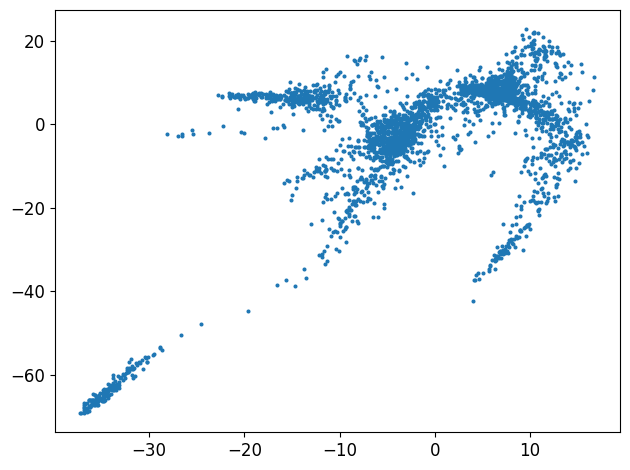

In [49]:
scprep.plot.scatter2d(z_pred)

In [50]:
from scipy.spatial.distance import pdist, squareform

In [51]:
distpred = squareform(pdist(z_pred))

In [52]:
distpred

array([[  0.        ,  21.81033352,  15.46093497, ..., 162.85618845,
         52.59196769,  42.65440011],
       [ 21.81033352,   0.        ,   9.89795751, ..., 171.99391738,
         64.75788955,  47.64295383],
       [ 15.46093497,   9.89795751,   0.        , ..., 168.97822405,
         56.42649452,  39.92102613],
       ...,
       [162.85618845, 171.99391738, 168.97822405, ...,   0.        ,
        135.05415739, 150.01818825],
       [ 52.59196769,  64.75788955,  56.42649452, ..., 135.05415739,
          0.        ,  24.77908845],
       [ 42.65440011,  47.64295383,  39.92102613, ..., 150.01818825,
         24.77908845,   0.        ]])

In [53]:
disttrue = data['dist']

In [54]:
disttrue

array([[  0.        ,  21.74416441,  16.44515712, ..., 167.29463577,
         51.77108574,  45.93630163],
       [ 21.74416441,   0.        ,   8.83790674, ..., 175.44935572,
         61.64580542,  50.24308521],
       [ 16.44515712,   8.83790674,   0.        , ..., 172.58722743,
         54.33342824,  43.76308646],
       ...,
       [167.29463577, 175.44935572, 172.58722743, ...,   0.        ,
        141.00986269, 152.28448713],
       [ 51.77108574,  61.64580542,  54.33342824, ..., 141.00986269,
          0.        ,  19.20667245],
       [ 45.93630163,  50.24308521,  43.76308646, ..., 152.28448713,
         19.20667245,   0.        ]])

In [55]:
z_pred2 = model.encode(x_all)

In [56]:
z_pred2

tensor([[  9.8006,   2.0030, -11.7436,  ...,  -0.7008,   0.3531,   2.3554],
        [  6.6878,   5.6314, -20.5881,  ...,  -5.2149,   0.2046,  11.1763],
        [  6.0098,   4.4245, -16.2694,  ...,  -6.2208,   1.0280,   9.3290],
        ...,
        [-36.8342, -67.9868,   8.5040,  ...,  51.6914, -79.5489, -39.8996],
        [ -4.4171,  -5.5845,   6.3174,  ...,  -2.4242, -15.9057,  -3.7408],
        [ -4.9030,  -2.2534,  -4.0955,  ..., -11.0463, -11.5642,   7.8322]],
       grad_fn=<AddmmBackward0>)

In [57]:
z_pred

array([[  9.800569  ,   2.0030339 , -11.743625  , ...,  -0.7008156 ,
          0.35308194,   2.3554165 ],
       [  6.687784  ,   5.631422  , -20.588118  , ...,  -5.214895  ,
          0.20460121,  11.176285  ],
       [  6.0097723 ,   4.4244976 , -16.269415  , ...,  -6.2208333 ,
          1.0280013 ,   9.329028  ],
       ...,
       [-36.834217  , -67.986755  ,   8.503977  , ...,  51.6914    ,
        -79.548935  , -39.899586  ],
       [ -4.4171405 ,  -5.5845165 ,   6.3174067 , ...,  -2.424236  ,
        -15.905683  ,  -3.740768  ],
       [ -4.902991  ,  -2.253387  ,  -4.0954623 , ..., -11.04633   ,
        -11.564161  ,   7.8321605 ]], dtype=float32)

In [58]:
model.std

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [59]:
x_pred

array([[-1.1700680e+00, -2.8843096e-01,  8.6463273e-01, ...,
         4.4803560e-01,  1.3608512e-01, -4.6276346e-01],
       [ 8.3235168e-01, -7.7258265e-01, -7.0431578e-01, ...,
         7.6219112e-02, -1.7676258e-01, -2.7038336e-02],
       [-4.9330086e-02, -1.2179701e+00, -6.3620067e-01, ...,
         3.2118163e-01,  2.9637358e-01, -4.4645140e-01],
       ...,
       [-5.1989412e+00, -1.1943295e+00,  7.0024467e+00, ...,
        -4.2348930e-01,  2.0868367e-01,  1.6534588e-01],
       [-4.4211316e+00, -1.2113764e+00,  1.0090330e+00, ...,
        -1.7254483e-03, -1.8470702e-01,  3.3872062e-01],
       [-1.0037644e+00, -3.0502915e+00, -1.3416854e+00, ...,
         2.4751772e-01,  1.3636759e-01,  2.2442569e-01]], dtype=float32)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

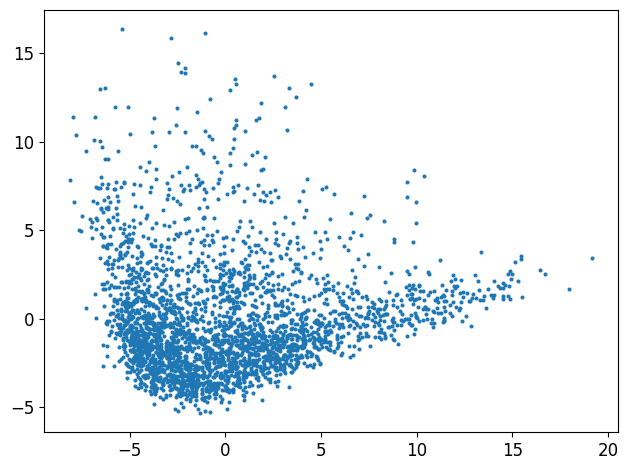

In [60]:
scprep.plot.scatter2d(data['data'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

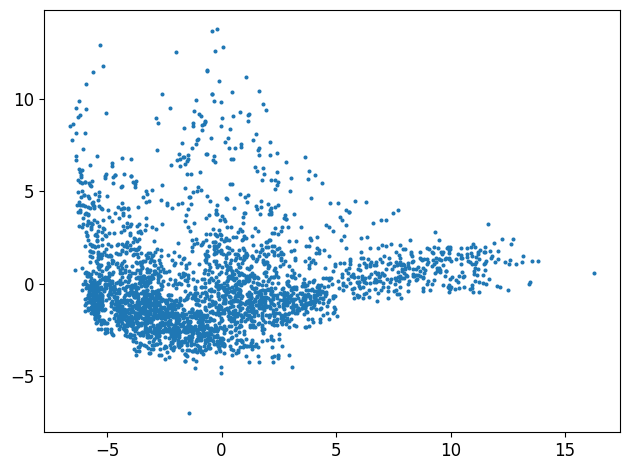

In [61]:
scprep.plot.scatter2d(x_pred)

In [62]:
trainloader, valloader, X, phate_coords, colors, dist, pp, mean, std = load_data(cfg, load_all=False)

In [63]:
X

array([[-0.21301298, -2.3534687 ,  0.5524443 , ...,  0.5493048 ,
         1.3934861 ,  0.17196587],
       [-1.3155088 , -1.1787565 , -0.9600033 , ...,  1.3089414 ,
        -0.77756536,  1.2356104 ],
       [-0.17299852, -3.7182226 , -1.9299909 , ...,  0.02395509,
        -0.8214241 , -0.23825574],
       ...,
       [-1.1791011 ,  5.685717  , -1.5876278 , ...,  2.584319  ,
        -0.2599245 ,  0.71141046],
       [-4.760755  , -1.411535  ,  4.5781436 , ..., -1.0765858 ,
        -0.09816735,  0.84981084],
       [-4.911862  , -0.62910384, -0.27711913, ..., -0.6270273 ,
        -1.4723185 , -0.5546906 ]], dtype=float32)

In [64]:
data['data']

array([[-1.7016331e+00,  8.8023923e-02,  2.0021570e+00, ...,
        -1.3836890e+00,  3.6277589e-01,  1.3107024e-01],
       [-2.1301298e-01, -2.3534687e+00,  5.5244428e-01, ...,
         5.4930478e-01,  1.3934861e+00,  1.7196587e-01],
       [-1.3155088e+00, -1.1787565e+00, -9.6000332e-01, ...,
         1.3089414e+00, -7.7756536e-01,  1.2356104e+00],
       ...,
       [-4.7607551e+00, -1.4115350e+00,  4.5781436e+00, ...,
        -1.0765858e+00, -9.8167352e-02,  8.4981084e-01],
       [-4.9118619e+00, -6.2910384e-01, -2.7711913e-01, ...,
        -6.2702727e-01, -1.4723185e+00, -5.5469060e-01],
       [-5.9857810e-01, -2.4779913e+00, -1.5524262e+00, ...,
         6.0734707e-01,  5.1273879e-02, -1.5904061e-03]], dtype=float32)

In [65]:
data['data'][data['is_train']]

array([[-0.21301298, -2.3534687 ,  0.5524443 , ...,  0.5493048 ,
         1.3934861 ,  0.17196587],
       [-1.3155088 , -1.1787565 , -0.9600033 , ...,  1.3089414 ,
        -0.77756536,  1.2356104 ],
       [-0.17299852, -3.7182226 , -1.9299909 , ...,  0.02395509,
        -0.8214241 , -0.23825574],
       ...,
       [-1.1791011 ,  5.685717  , -1.5876278 , ...,  2.584319  ,
        -0.2599245 ,  0.71141046],
       [-4.760755  , -1.411535  ,  4.5781436 , ..., -1.0765858 ,
        -0.09816735,  0.84981084],
       [-4.911862  , -0.62910384, -0.27711913, ..., -0.6270273 ,
        -1.4723185 , -0.5546906 ]], dtype=float32)